In [4]:
import numpy as np
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog
import pandas as pd

lebron_list = players.find_players_by_full_name("LeBron James")
if lebron_list:
    # We assume the first matching result is LeBron James (typically his full_name is "LeBron James")
    lebron = lebron_list[0]
    player_id = lebron['id']
    print("LeBron James player ID:", player_id)
else:
    raise Exception("Player not found.")

LeBron James player ID: 2544


In [27]:
import time


regular_season_career = pd.DataFrame()
playoff_career = pd.DataFrame()

# Define the range of seasons; LeBron's rookie season was 2003-04.
# For example, to get seasons from 2003-04 up to 2022-23:
start_year = 2003
end_year = 2025  # end_year is the starting calendar year for the season, e.g., 2022-23 season => 2025

# Loop over each season
for season_year in range(start_year, end_year):
    # Format the season string as "YYYY-YY"
    season_str = f"{season_year}-{str(season_year + 1)[-2:]}"
    print(f"\nFetching game logs for season: {season_str}")

    # Regular Season
    try:
        reg_logs = playergamelog.PlayerGameLog(player_id=player_id, season=season_str, season_type_all_star='Regular Season')
        reg_df = reg_logs.get_data_frames()[0]
        # Add season info as a new column
        reg_df['SEASON'] = season_str
        regular_season_career = pd.concat([regular_season_career, reg_df], ignore_index=True)
        print(f"  Regular season games fetched: {len(reg_df)}")
    except Exception as e:
        print(f"  Could not fetch regular season logs for {season_str}: {e}")

    # Playoffs
    try:
        playoff_logs = playergamelog.PlayerGameLog(player_id=player_id, season=season_str, season_type_all_star='Playoffs')
        playoff_df = playoff_logs.get_data_frames()[0]
        playoff_df['SEASON'] = season_str
        playoff_career = pd.concat([playoff_career, playoff_df], ignore_index=True)
        print(f"  Playoff games fetched: {len(playoff_df)}")
    except Exception as e:
        print(f"  Could not fetch playoff logs for {season_str}: {e}")

    # Optional: pause to be respectful with API calls (avoid hitting rate limits)
    time.sleep(1)

# Display the first few rows of the complete career logs
print("\nComplete Regular Season Career Game Logs:")
print(regular_season_career.head())

print("\nComplete Playoff Career Game Logs:")
print(playoff_career.head())



Fetching game logs for season: 2003-04
  Regular season games fetched: 79
  Playoff games fetched: 0

Fetching game logs for season: 2004-05
  Regular season games fetched: 80
  Playoff games fetched: 0

Fetching game logs for season: 2005-06
  Regular season games fetched: 79


/var/folders/jm/k0sbz0kn3lv4fr42mlqlgyz40000gn/T/ipykernel_69804/3626996186.py:34: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



  Playoff games fetched: 13

Fetching game logs for season: 2006-07
  Regular season games fetched: 78
  Playoff games fetched: 20

Fetching game logs for season: 2007-08
  Regular season games fetched: 75
  Playoff games fetched: 13

Fetching game logs for season: 2008-09
  Regular season games fetched: 81
  Playoff games fetched: 14

Fetching game logs for season: 2009-10
  Regular season games fetched: 76
  Playoff games fetched: 11

Fetching game logs for season: 2010-11
  Regular season games fetched: 79
  Playoff games fetched: 21

Fetching game logs for season: 2011-12
  Regular season games fetched: 62
  Playoff games fetched: 23

Fetching game logs for season: 2012-13
  Regular season games fetched: 76
  Playoff games fetched: 23

Fetching game logs for season: 2013-14
  Regular season games fetched: 77
  Playoff games fetched: 20

Fetching game logs for season: 2014-15
  Regular season games fetched: 69
  Playoff games fetched: 20

Fetching game logs for season: 2015-16
  Reg

/var/folders/jm/k0sbz0kn3lv4fr42mlqlgyz40000gn/T/ipykernel_69804/3626996186.py:34: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



  Playoff games fetched: 0

Fetching game logs for season: 2019-20
  Regular season games fetched: 67
  Playoff games fetched: 21

Fetching game logs for season: 2020-21
  Regular season games fetched: 45
  Playoff games fetched: 6

Fetching game logs for season: 2021-22
  Regular season games fetched: 56


/var/folders/jm/k0sbz0kn3lv4fr42mlqlgyz40000gn/T/ipykernel_69804/3626996186.py:34: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



  Playoff games fetched: 0

Fetching game logs for season: 2022-23
  Regular season games fetched: 55
  Playoff games fetched: 16

Fetching game logs for season: 2023-24
  Regular season games fetched: 71
  Playoff games fetched: 5

Fetching game logs for season: 2024-25
  Regular season games fetched: 70
  Playoff games fetched: 4

Complete Regular Season Career Game Logs:
  SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0     22003       2544  0020301179  Apr 14, 2004    CLE @ NYK  W   35    8   
1     22003       2544  0020301162  Apr 12, 2004  CLE vs. MIL  W   45    9   
2     22003       2544  0020301151  Apr 10, 2004  CLE vs. MIA  W   32    4   
3     22003       2544  0020301137  Apr 09, 2004    CLE @ MIA  L   42    6   
4     22003       2544  0020301128  Apr 07, 2004    CLE @ MEM  L   36    4   

   FGA  FG_PCT  ...  REB  AST  STL  BLK  TOV  PF  PTS  PLUS_MINUS  \
0   17   0.471  ...    1    5    3    0    5   1   17          -6   
1   20   0.450  

In [28]:
print(regular_season_career.head())
print(regular_season_career.columns)

  SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0     22003       2544  0020301179  Apr 14, 2004    CLE @ NYK  W   35    8   
1     22003       2544  0020301162  Apr 12, 2004  CLE vs. MIL  W   45    9   
2     22003       2544  0020301151  Apr 10, 2004  CLE vs. MIA  W   32    4   
3     22003       2544  0020301137  Apr 09, 2004    CLE @ MIA  L   42    6   
4     22003       2544  0020301128  Apr 07, 2004    CLE @ MEM  L   36    4   

   FGA  FG_PCT  ...  REB  AST  STL  BLK  TOV  PF  PTS  PLUS_MINUS  \
0   17   0.471  ...    1    5    3    0    5   1   17          -6   
1   20   0.450  ...    7    9    2    0    1   1   27          11   
2   11   0.364  ...    3   11    0    0    2   3   10          14   
3   14   0.429  ...    7    8    1    0    8   2   24         -16   
4   11   0.364  ...    3    5    3    0    2   4   14         -11   

   VIDEO_AVAILABLE   SEASON  
0                0  2003-04  
1                0  2003-04  
2                0  2003-0

In [29]:
regular_season_career.to_csv("LeBron_Regular_Season_Career_Game_Logs.csv", index=False)
playoff_career.to_csv("LeBron_Playoff_Career_Game_Logs.csv", index=False)

In [75]:
regular_season_career = pd.read_csv("LeBron_Regular_Season_Career_Game_Logs.csv")
playoff_career = pd.read_csv("LeBron_Playoff_Career_Game_Logs.csv")

In [8]:
regular_season_career.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,SEASON
0,22003,2544,20301179,"APR 14, 2004",CLE @ NYK,W,35,8,17,0.471,...,1,5,3,0,5,1,17,-6,0,2003-04
1,22003,2544,20301162,"APR 12, 2004",CLE vs. MIL,W,45,9,20,0.450,...,7,9,2,0,1,1,27,11,0,2003-04
2,22003,2544,20301151,"APR 10, 2004",CLE vs. MIA,W,32,4,11,0.364,...,3,11,0,0,2,3,10,14,0,2003-04
3,22003,2544,20301137,"APR 09, 2004",CLE @ MIA,L,42,6,14,0.429,...,7,8,1,0,8,2,24,-16,0,2003-04
4,22003,2544,20301128,"APR 07, 2004",CLE @ MEM,L,36,4,11,0.364,...,3,5,3,0,2,4,14,-11,0,2003-04


In [5]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
from sqlalchemy import text

# parameters
# !!! Please change below information with your local information
host_ip = "3.16.186.38" # Use your own EC2 instance IP address.
id = "test1" # Use your 'test1' username you created in Lab 10.
pw = "Test1234#"  # Use your 'Test1234#' password you created in Lab 10.

# connect to mysql server
url = URL.create(
    drivername="mysql+pymysql",
    host=host_ip,
    port=3306,
    username= id,
    password=pw)

sqlEngine = create_engine(url)
sql_connection = sqlEngine.connect()

In [31]:
sql_connection.execute(text('DROP DATABASE IF EXISTS LebronDatabase'))

In [32]:
# Make a new database. For your project, make sure you only run this step once at the beginning. You must be able to see the database in Workbench after running this command.
sql_connection.execute(text("CREATE DATABASE IF NOT EXISTS LebronDatabase"))

In [6]:
db_url = URL.create(
    drivername="mysql+pymysql",
    host=host_ip,
    port=3306,
    username=id,
    password=pw,
    database="LebronDatabase"
)

db_engine = create_engine(db_url)

In [34]:

regular_season_career.to_sql(name='RegularBoxScores', con=db_engine, if_exists='replace')


1562

In [35]:
playoff_career.to_sql(name='PlayoffBoxScores', con=db_engine, if_exists='replace')

291

In [76]:
regular_df = pd.read_sql("SELECT * FROM LebronDatabase.RegularBoxScores", db_engine)
playoff_df = pd.read_sql("SELECT * FROM LebronDatabase.PlayoffBoxScores", db_engine)

print(regular_df.head())

   index  SEASON_ID  Player_ID   Game_ID     GAME_DATE      MATCHUP WL  MIN  \
0      0      22003       2544  20301179  Apr 14, 2004    CLE @ NYK  W   35   
1      1      22003       2544  20301162  Apr 12, 2004  CLE vs. MIL  W   45   
2      2      22003       2544  20301151  Apr 10, 2004  CLE vs. MIA  W   32   
3      3      22003       2544  20301137  Apr 09, 2004    CLE @ MIA  L   42   
4      4      22003       2544  20301128  Apr 07, 2004    CLE @ MEM  L   36   

   FGM  FGA  ...  REB  AST  STL  BLK  TOV  PF  PTS  PLUS_MINUS  \
0    8   17  ...    1    5    3    0    5   1   17          -6   
1    9   20  ...    7    9    2    0    1   1   27          11   
2    4   11  ...    3   11    0    0    2   3   10          14   
3    6   14  ...    7    8    1    0    8   2   24         -16   
4    4   11  ...    3    5    3    0    2   4   14         -11   

   VIDEO_AVAILABLE   SEASON  
0                0  2003-04  
1                0  2003-04  
2                0  2003-04  
3       

In [77]:
regular_df.columns

Index(['index', 'SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE', 'SEASON'],
      dtype='object')

In [78]:
playoff_df.columns

Index(['index', 'SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE', 'SEASON'],
      dtype='object')

In [79]:
regular_df['Season_Type'] = 'Regular'
playoff_df['Season_Type'] = 'Playoffs'
games = pd.concat([regular_df, playoff_df], ignore_index=True)

In [80]:
def get_team(year):
    if year <= 2010:
        return "CLE"
    elif 2011 <= year <= 2014:
        return "MIA"
    elif 2015 <= year <= 2018:
        return "CLE"
    elif year >= 2019:
        return "LAL"
    else:
        return None
def extract_opponent(row):
    # MATCHUP format: "TEAM1 vs. TEAM2" or "TEAM1 @ TEAM2"
    parts = row['MATCHUP'].split()
    if parts[1] in ['vs.', '@']:
        if parts[0] == row['TEAM']:
            return parts[2]
        else:
            return parts[0]
    return None


In [81]:
games = games.drop(columns = ['index',"Player_ID", "VIDEO_AVAILABLE"])
games['SEASON_YEAR'] = 2000+games['SEASON'].str[-2:].astype(int)
games['TEAM'] = games['SEASON_YEAR'].astype(int).apply(get_team)
games['OPPONENT'] = games.apply(extract_opponent, axis=1)

In [82]:
games[games['TEAM'] == "MIA"]

,SEASON_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,...,BLK,TOV,PF,PTS,PLUS_MINUS,SEASON,Season_Type,SEASON_YEAR,TEAM,OPPONENT
548,22010,21001202,"Apr 11, 2011",MIA @ ATL,W,43,10,21,0.476,2,...,0,7,1,34,7,2010-11,Regular,2011,MIA,ATL
549,22010,21001194,"Apr 10, 2011",MIA vs. BOS,W,37,11,19,0.579,0,...,1,4,1,27,24,2010-11,Regular,2011,MIA,BOS
550,22010,21001182,"Apr 08, 2011",MIA vs. CHA,W,37,9,16,0.563,0,...,1,1,2,23,12,2010-11,Regular,2011,MIA,CHA
551,22010,21001164,"Apr 06, 2011",MIA vs. MIL,L,39,10,22,0.455,3,...,2,4,2,29,-10,2010-11,Regular,2011,MIA,MIL
552,22010,21001142,"Apr 03, 2011",MIA @ NJN,W,39,13,18,0.722,0,...,0,7,2,31,13,2010-11,Regular,2011,MIA,NJN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,42013,41300211,"May 06, 2014",MIA vs. BKN,W,36,10,15,0.667,0,...,0,1,2,22,10,2013-14,Playoffs,2014,MIA,BKN
1716,42013,41300114,"Apr 28, 2014",MIA @ CHA,W,43,10,19,0.526,1,...,1,2,3,31,12,2013-14,Playoffs,2014,MIA,CHA
1717,42013,41300113,"Apr 26, 2014",MIA @ CHA,W,36,10,18,0.556,1,...,0,2,1,30,20,2013-14,Playoffs,2014,MIA,CHA
1718,42013,41300112,"Apr 23, 2014",MIA vs. CHA,W,40,11,17,0.647,1,...,0,4,2,32,6,2013-14,Playoffs,2014,MIA,CHA


In [83]:
games.to_sql(name='games', con=db_engine, if_exists='replace')

1853

In [4]:
games = pd.read_sql("SELECT * FROM LebronDatabase.games", db_engine, parse_dates=['GAME_DATE'])

In [5]:
games

,index,SEASON_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,Season_Type,SEASON_YEAR,TEAM,OPPONENT,cluster,similar_game_1,similar_game_2,similar_game_3,similar_game_4,similar_game_5
0,0,22003,20300014,2003-10-29,CLE @ SAC,L,42,12,20,0.600,...,Regular,2004,CLE,SAC,5,70,679,1422,900,98
1,1,22003,20300018,2003-10-30,CLE @ PHX,L,41,8,17,0.471,...,Regular,2004,CLE,PHX,10,924,1414,1416,1229,1362
2,2,22003,20300038,2003-11-01,CLE @ POR,L,39,3,12,0.250,...,Regular,2004,CLE,POR,8,1734,1782,1002,93,415
3,3,22003,20300057,2003-11-05,CLE vs. DEN,L,41,3,11,0.273,...,Regular,2004,CLE,DEN,9,716,88,950,837,345
4,4,22003,20300068,2003-11-07,CLE @ IND,L,44,8,18,0.444,...,Regular,2004,CLE,IND,2,784,963,1041,905,559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,1848,22024,22401185,2025-04-11,LAL vs. HOU,W,22,6,11,0.545,...,Regular,2025,LAL,HOU,8,1731,1067,993,621,750
1849,1849,42024,42400161,2025-04-19,LAL vs. MIN,L,36,8,18,0.444,...,Playoffs,2025,LAL,MIN,8,426,718,260,1351,143
1850,1850,42024,42400162,2025-04-22,LAL vs. MIN,W,40,8,19,0.421,...,Playoffs,2025,LAL,MIN,7,333,300,391,860,815
1851,1851,42024,42400163,2025-04-25,LAL @ MIN,L,41,13,21,0.619,...,Playoffs,2025,LAL,MIN,3,1049,1630,739,890,999


In [86]:
games = games.sort_values(by=['GAME_DATE'], ascending=True)
games = games.reset_index(drop=True)
games = games.drop(columns = ['index'])

In [87]:
games.describe()

,SEASON_ID,Game_ID,GAME_DATE,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,SEASON_YEAR
count,1853.000000,1.853000e+03,1853,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,...,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000
mean,25153.822450,2.443836e+07,2014-01-28 00:48:10.879654656,38.359957,9.956827,19.722612,0.506089,1.639504,4.727469,0.309798,...,6.536967,7.745278,7.378845,1.530491,0.773880,3.515920,1.857528,27.226659,4.689153,2013.969779
min,22003.000000,2.030001e+07,2003-10-29 00:00:00,11.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-39.000000,2004.000000
25%,22008.000000,2.080109e+07,2008-12-21 00:00:00,35.000000,8.000000,16.000000,0.435000,0.000000,3.000000,0.000000,...,5.000000,6.000000,5.000000,1.000000,0.000000,2.000000,1.000000,22.000000,-4.000000,2009.000000
50%,22015.000000,2.150023e+07,2013-12-16 00:00:00,39.000000,10.000000,20.000000,0.500000,1.000000,4.000000,0.333000,...,6.000000,7.000000,7.000000,1.000000,1.000000,3.000000,2.000000,27.000000,6.000000,2014.000000
75%,22022.000000,2.220049e+07,2018-10-31 00:00:00,42.000000,12.000000,23.000000,0.579000,2.000000,6.000000,0.500000,...,8.000000,10.000000,9.000000,2.000000,1.000000,5.000000,3.000000,32.000000,14.000000,2019.000000
max,42024.000000,4.240016e+07,2025-04-27 00:00:00,55.000000,23.000000,38.000000,0.929000,9.000000,14.000000,1.000000,...,19.000000,20.000000,19.000000,7.000000,5.000000,11.000000,6.000000,61.000000,46.000000,2025.000000
std,7278.861465,7.311802e+06,NaN,5.283379,3.099375,4.819161,0.110522,1.506858,2.529883,0.240216,...,2.805302,3.131372,2.938356,1.264127,0.913735,1.864871,1.284647,7.833196,13.017204,6.114561


In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [127]:
games.columns

Index(['SEASON_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'PLUS_MINUS', 'SEASON', 'Season_Type', 'SEASON_YEAR', 'TEAM',
       'OPPONENT', 'cluster', 'PC1', 'PC2'],
      dtype='object')

In [88]:
features = ['MIN', 'FG3M', 'FG3A', 'FTM', 'FTA','OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS']
X = games[features]


##Scaling Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


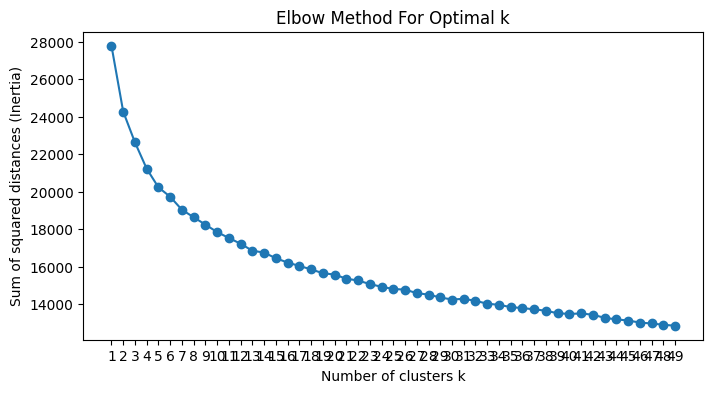

In [89]:
##Elbow Method
inertia = []
K = range(1, 50)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'o-', markersize=6)
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.show()

In [90]:
#Final with best K
best_k = 12
kmeans = KMeans(n_clusters=best_k, random_state=42)
games['cluster'] = kmeans.fit_predict(X_scaled)

#Looking at centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centers, columns=features)
print("Centroids (in original feature units):")
print(centroid_df)

#Cluster stats
print("\nCluster sizes:")
print(games['cluster'].value_counts())

Centroids (in original feature units):
          MIN      FG3M      FG3A        FTM        FTA      OREB       DREB  \
0   40.764192  1.253275  4.283843   8.462882  11.056769  1.034934   4.746725   
1   34.558011  0.883978  3.160221   3.939227   5.375691  1.016575   7.895028   
2   39.645570  1.506329  4.778481   4.139241   5.968354  0.677215   5.139241   
3   41.703704  4.592593  9.037037   7.888889  10.435185  1.398148   7.916667   
4   42.131783  1.162791  4.162791  12.790698  16.038760  1.317829   7.558140   
5   40.342697  0.898876  3.297753   5.241573   7.000000  1.264045   6.730337   
6   33.487179  1.044872  2.980769   5.256410   6.826923  0.788462   4.583333   
7   42.246269  1.246269  4.611940   6.731343   9.373134  3.186567   9.582090   
8   33.503226  0.729032  3.077419   2.793548   4.161290  0.806452   3.851613   
9   37.951724  1.482759  5.331034   3.648276   5.351724  1.717241   7.310345   
10  39.627119  2.245763  6.500000   4.186441   6.330508  0.991525  10.872881   
1

In [91]:
games.loc[X.index, 'cluster'] = kmeans.fit_predict(X_scaled)

In [92]:
games.head()

,SEASON_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,...,TOV,PF,PTS,PLUS_MINUS,SEASON,Season_Type,SEASON_YEAR,TEAM,OPPONENT,cluster
0,22003,20300014,2003-10-29,CLE @ SAC,L,42,12,20,0.600,0,...,2,3,25,-9,2003-04,Regular,2004,CLE,SAC,5
1,22003,20300018,2003-10-30,CLE @ PHX,L,41,8,17,0.471,1,...,7,1,21,-3,2003-04,Regular,2004,CLE,PHX,10
2,22003,20300038,2003-11-01,CLE @ POR,L,39,3,12,0.250,0,...,2,3,8,-21,2003-04,Regular,2004,CLE,POR,8
3,22003,20300057,2003-11-05,CLE vs. DEN,L,41,3,11,0.273,0,...,2,1,7,-3,2003-04,Regular,2004,CLE,DEN,9
4,22003,20300068,2003-11-07,CLE @ IND,L,44,8,18,0.444,1,...,7,2,23,-7,2003-04,Regular,2004,CLE,IND,2


In [93]:
def find_similar_games(games_df, features, game_idx, n_neighbors=5):
    selected_cluster = games_df.loc[game_idx, 'cluster']
    
    mask = games_df['cluster'] == selected_cluster
    cluster_indices = games_df.index[mask]
    X_cluster = games_df.loc[mask, features]

    nn = NearestNeighbors(n_neighbors=n_neighbors+1, metric='euclidean')
    nn.fit(X_cluster)
    
    selected_vec = games_df.loc[[game_idx], features]
    
    distances, neighbors = nn.kneighbors(selected_vec)
    
    similar_idxs = cluster_indices[neighbors.flatten()][1:]  # drop itself
    return list(similar_idxs)


sim_cols = pd.DataFrame(
    games.index.map(
        lambda idx: find_similar_games(games, features, game_idx=idx, n_neighbors=5)
    ).tolist(),
    index=games.index,
    columns=[f'similar_game_{i+1}' for i in range(5)]
)

# 3) Join those 5 new columns back onto your original df
games = games.join(sim_cols)



In [6]:
games

,index,SEASON_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,Season_Type,SEASON_YEAR,TEAM,OPPONENT,cluster,similar_game_1,similar_game_2,similar_game_3,similar_game_4,similar_game_5
0,0,22003,20300014,2003-10-29,CLE @ SAC,L,42,12,20,0.600,...,Regular,2004,CLE,SAC,5,70,679,1422,900,98
1,1,22003,20300018,2003-10-30,CLE @ PHX,L,41,8,17,0.471,...,Regular,2004,CLE,PHX,10,924,1414,1416,1229,1362
2,2,22003,20300038,2003-11-01,CLE @ POR,L,39,3,12,0.250,...,Regular,2004,CLE,POR,8,1734,1782,1002,93,415
3,3,22003,20300057,2003-11-05,CLE vs. DEN,L,41,3,11,0.273,...,Regular,2004,CLE,DEN,9,716,88,950,837,345
4,4,22003,20300068,2003-11-07,CLE @ IND,L,44,8,18,0.444,...,Regular,2004,CLE,IND,2,784,963,1041,905,559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,1848,22024,22401185,2025-04-11,LAL vs. HOU,W,22,6,11,0.545,...,Regular,2025,LAL,HOU,8,1731,1067,993,621,750
1849,1849,42024,42400161,2025-04-19,LAL vs. MIN,L,36,8,18,0.444,...,Playoffs,2025,LAL,MIN,8,426,718,260,1351,143
1850,1850,42024,42400162,2025-04-22,LAL vs. MIN,W,40,8,19,0.421,...,Playoffs,2025,LAL,MIN,7,333,300,391,860,815
1851,1851,42024,42400163,2025-04-25,LAL @ MIN,L,41,13,21,0.619,...,Playoffs,2025,LAL,MIN,3,1049,1630,739,890,999


In [95]:
games.to_sql(name='games', con=db_engine, if_exists='replace')

1853

In [13]:
games = pd.read_sql("SELECT * FROM LebronDatabase.games", db_engine, parse_dates=['GAME_DATE'])

In [42]:
games

,index,SEASON_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,SEASON_YEAR,TEAM,OPPONENT,cluster,similar_game_1,similar_game_2,similar_game_3,similar_game_4,similar_game_5,MA
0,0,22003,20300014,2003-10-29,CLE @ SAC,L,42,12,20,0.600,...,2004,CLE,SAC,5,70,679,1422,900,98,25.000000
1,1,22003,20300018,2003-10-30,CLE @ PHX,L,41,8,17,0.471,...,2004,CLE,PHX,10,924,1414,1416,1229,1362,23.000000
2,2,22003,20300038,2003-11-01,CLE @ POR,L,39,3,12,0.250,...,2004,CLE,POR,8,1734,1782,1002,93,415,18.000000
3,3,22003,20300057,2003-11-05,CLE vs. DEN,L,41,3,11,0.273,...,2004,CLE,DEN,9,716,88,950,837,345,15.250000
4,4,22003,20300068,2003-11-07,CLE @ IND,L,44,8,18,0.444,...,2004,CLE,IND,2,784,963,1041,905,559,16.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,1848,22024,22401185,2025-04-11,LAL vs. HOU,W,22,6,11,0.545,...,2025,LAL,HOU,8,1731,1067,993,621,750,25.433333
1849,1849,42024,42400161,2025-04-19,LAL vs. MIN,L,36,8,18,0.444,...,2025,LAL,MIN,8,426,718,260,1351,143,25.333333
1850,1850,42024,42400162,2025-04-22,LAL vs. MIN,W,40,8,19,0.421,...,2025,LAL,MIN,7,333,300,391,860,815,25.000000
1851,1851,42024,42400163,2025-04-25,LAL @ MIN,L,41,13,21,0.619,...,2025,LAL,MIN,3,1049,1630,739,890,999,25.466667


In [8]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go

In [9]:
# Define features list
features = ['MIN', 'FG3M', 'FG3A', 'FTM', 'FTA','OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS']

# Load data from SQL (using your existing connection)
games = pd.read_sql("SELECT * FROM LebronDatabase.games", db_engine, parse_dates=['GAME_DATE'])


# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("LeBron James Career Statistics Dashboard", style={'textAlign': 'center'}),
    
    # First row - Time Series and Bar Chart
    html.Div([
        # Time Series Graph
        html.Div([
            html.H3("Statistic Over Time"),
            dcc.Dropdown(
                id='stat-dropdown',
                options=[{'label': col, 'value': col} for col in features],
                value='PTS',
                style={'width': '100%'}
            ),
            dcc.Graph(id='time-series-graph')
        ], style={'width': '50%', 'display': 'inline-block'}),
        


        # Bar Chart
        html.Div([
            html.H3("Average by Team"),
            # ← New season‐type dropdown
            dcc.Dropdown(
                id='season-type-dropdown',
                options=[
                    {'label': 'Regular', 'value': 'Regular'},
                    {'label': 'Playoffs', 'value': 'Playoffs'},
                ],
                value=['Regular', 'Playoffs'],  # select both by default
                multi=True,
                style={'width': '100%', 'margin-bottom': '10px'}
            ),
            dcc.Graph(id='team-bar-chart')
        ], style={'width': '50%', 'display': 'inline-block'})
    ]),
    
    # Second row - Scatter Plot
    html.Div([
        html.H3("Statistic Comparison"),
        html.Div([
            dcc.Dropdown(
                id='x-stat-dropdown',
                options=[{'label': col, 'value': col} for col in features],
                value='PTS',
                style={'width': '100%'}
            ),
            dcc.Dropdown(
                id='y-stat-dropdown',
                options=[{'label': col, 'value': col} for col in features],
                value='AST',
                style={'width': '100%'}
            ),
            dcc.DatePickerSingle(
                id='game-date-picker',
                date=games['GAME_DATE'].min().date(),
                display_format='YYYY-MM-DD',
                style={'width': '30%', 'display':'inline-block'}
            ),
            dcc.Graph(id='scatter-plot')
        ], style={'width': '100%'})
    ])
])

# Callback for time series graph
@app.callback(
    Output('time-series-graph', 'figure'),
    Input('stat-dropdown', 'value')
)
def update_time_series(selected_stat):
    # Create the base scatter plot with all points
    fig = px.scatter(games, x='GAME_DATE', y=selected_stat,
                     title=f'{selected_stat} Over Time',
                     hover_data=['MATCHUP', 'TEAM'],
                     opacity=0.1)
    
    # Calculate moving average (30-game window)
    games['MA'] = games[selected_stat].rolling(window=30, min_periods=1).mean()
    
    # Add the moving average line
    fig.add_trace(go.Scatter(
        x=games['GAME_DATE'],
        y=games['MA'],
        mode='lines',
        line=dict(color='red', width=2),
        name='30-Game Moving Average'
    ))
    
    fig.update_layout(
        xaxis_title='Date',
        yaxis_title=selected_stat,
        showlegend=True
    )
    return fig

# Callback for team bar chart
@app.callback(
    Output('team-bar-chart', 'figure'),
    Input('stat-dropdown', 'value'),
    Input('season-type-dropdown', 'value')
)
def update_team_bar(selected_stat, selected_seasons):
    filtered = games[games['Season_Type'].isin(selected_seasons)]
    team_avg = filtered.groupby('TEAM')[selected_stat].mean().reset_index()
    color_map = {
        'LAL': '#FDB927',
        'MIA': '#98002E',
        'CLE': '#041E42'
    }


    fig = px.bar(
        team_avg,
        x='TEAM',
        y=selected_stat,
        color='TEAM',
        color_discrete_map=color_map,
        title=f'Average {selected_stat} by Team'
    )
    fig.update_layout(
        xaxis_title='Team',
        yaxis_title=f'Average {selected_stat}',
        showlegend=False
        )
    return fig

# Callback for scatter plot
@app.callback(
    Output('scatter-plot', 'figure'),
    Input('x-stat-dropdown', 'value'),
    Input('y-stat-dropdown', 'value'),
    Input('game-date-picker', 'date')
)
def update_scatter(x_stat, y_stat, selected_date):
    # If no date picked, return empty fig
    if not selected_date:
        return go.Figure()

    # Convert to datetime.date
    sel_date = pd.to_datetime(selected_date).date()

    # Filter games on that date
    today_games = games[games['GAME_DATE'].dt.date == sel_date]
    if today_games.empty:
        # No game that day → blank figure or with a message
        fig = go.Figure()
        fig.update_layout(
            title=f"No game on {sel_date}",
            xaxis_title=x_stat,
            yaxis_title=y_stat
        )
        return fig

    # If multiple games (e.g. playoffs+regular), pick the first
    selected_stats = today_games.iloc[0]

    # Find your 5 similar games (assuming you have those indices stored)
    sim_indices = [selected_stats[f'similar_game_{i}'] for i in range(1, 6)]
    sim_games = games.loc[sim_indices]

    # Build the scatter
    fig = px.scatter(
        sim_games, x=x_stat, y=y_stat,
        title=f"{x_stat} vs {y_stat} (highlighting {sel_date})",
        hover_data=['GAME_DATE', 'TEAM']
    )

    # Highlight the chosen game
    fig.add_trace(go.Scatter(
        x=[selected_stats[x_stat]],
        y=[selected_stats[y_stat]],
        mode='markers',
        marker=dict(size=14, color='red'),
        name=f"Game on {sel_date}"
    ))

    fig.update_layout(xaxis_title=x_stat, yaxis_title=y_stat)
    return fig

In [10]:
if __name__ == '__main__':
    app.run(debug=True)